# Minimum working example

This is a simple minimum working example to get started, along the lines of the one given in https://emg3d.readthedocs.io/en/stable/usage.html#example.

To see some more realistic models have a look at the other notebooks in this repo.

-------------------------------------------------------------------------------
This notebooks uses `discretize` to create meshes easily and plot the model as well as the resulting electric field, which also requires `matplotlib`. If you are interested in a basic example that only requires `emg3d` here it is:

```py
import emg3d
import numpy as np

# Create a simple grid, 8 cells of length 1 in each direction, starting at the origin.
grid = emg3d.utils.TensorMesh([np.ones(8), np.ones(8), np.ones(8)], x0=np.array([0, 0, 0]))

# The model is a fullspace with tri-axial anisotropy.
model = emg3d.utils.Model(grid, res_x=1.5, res_y=1.8, res_z=3.3)

# The source is a x-directed, horizontal dipole at (4, 4, 4), frequency is 10 Hz.
sfield = emg3d.utils.get_source_field(grid, src=[4, 4, 4, 0, 0], freq=10.0)

# Calculate the electric signal.
efield = emg3d.solver.solver(grid, model, sfield, verb=3)

# Get the corresponding magnetic signal.
hfield = emg3d.utils.get_h_field(grid, model, efield) 
```
-------------------------------------------------------------------------------

**Requires**
- **emg3d >= 0.9.1**
- discretize, matplotlib

First, we load `emg3d` and `discretize` (to create a mesh), along with `numpy` and `matplotlib`:

In [1]:
import emg3d
import discretize
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
%matplotlib notebook
plt.style.use('ggplot')

### 1. Mesh

First, we define the mesh (see `discretize.TensorMesh` for more info). In reality, this task requires some careful considerations. E.g., to avoid edge effects, the mesh should be large enough in order for the fields to dissipate, yet fine enough around source and receiver to accurately model them. This grid is too small, but serves as a minimal example.

In [3]:
grid = discretize.TensorMesh(
        [[(25, 10, -1.04), (25, 28), (25, 10, 1.04)],
         [(50, 8, -1.03), (50, 16), (50, 8, 1.03)],
         [(30, 8, -1.05), (30, 16), (30, 8, 1.05)]],
        x0='CCC')
grid

TensorMesh: 49,152 cells

                      MESH EXTENT             CELL WIDTH      FACTOR
  dir    nC        min           max         min       max      max
  ---   ---  ---------------------------  ------------------  ------
   x     48       -662.16        662.16     25.00     37.01    1.04
   y     32       -857.96        857.96     50.00     63.34    1.03
   z     32       -540.80        540.80     30.00     44.32    1.05

### 2. Model

Next we define a very simple fullspace model with $\rho_x=1.5\,\Omega\rm{m}$,  $\rho_y=1.8\,\Omega\rm{m}$, and  $\rho_z=3.3\,\Omega\rm{m}$.

In [4]:
model = emg3d.utils.Model(grid, res_x=1.5, res_y=1.8, res_z=3.3)

We can plot the model using `discretize`; in this case it is obviously rather a boring plot, as it shows a homogenous fullspace. 

<IPython.core.display.Javascript object>


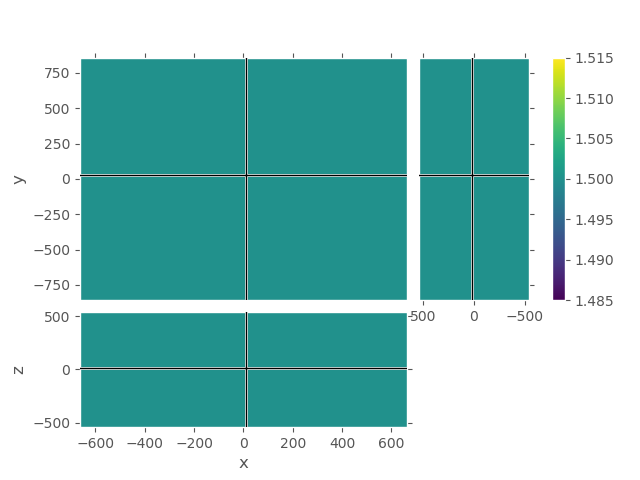

In [5]:
grid.plot_3d_slicer(np.ones(grid.vnC)*model.res_x)  # x-resistivity

### 3. Source field

The source is an x-directed dipole at the origin, with a 10 Hz signal of 1 A (`src` is defined either as `[x, y, z, dip, azimuth]` or `[x0, x1, y0, y1, z0, z1]`; the strength can be set via the `strength` parameter).

In [6]:
sfield = emg3d.utils.get_source_field(grid, src=[0, 0, 0, 0, 0], freq=10)

### 4. Calculate the electric field

Now we can calculate the electric field with `emg3d`:

In [7]:
efield = emg3d.solver.solver(grid, model, sfield, verb=3)


* WARNING :: ``emg3d.solver.solver()`` is renamed to ``emg3d.solve()``.
             Use the new ``emg3d.solve()``, as ``solver()`` will be
             removed in the future.

:: emg3d START :: 07:31:17 :: v0.9.3.dev17

   MG-cycle       : 'F'                 sslsolver : False
   semicoarsening : False [0]           tol       : 1e-06
   linerelaxation : False [0]           maxit     : 50
   nu_{i,1,c,2}   : 0, 2, 1, 2          verb      : 3
   Original grid  :  48 x  32 x  32     => 49,152 cells
   Coarsest grid  :   3 x   2 x   2     => 12 cells
   Coarsest level :   4 ;   4 ;   4   

   [hh:mm:ss]  rel. error                  [abs. error, last/prev]   l s

       h_
      2h_ \                  /
      4h_  \          /\    / 
      8h_   \    /\  /  \  /  
     16h_    \/\/  \/    \/   

   [07:31:18]   2.623e-02  after   1 F-cycles   [1.464e-06, 0.026]   0 0
   [07:31:18]   2.253e-03  after   2 F-cycles   [1.258e-07, 0.086]   0 0
   [07:31:18]   3.051e-04  after   3 F-cycles   [1

The calculation requires in this case seven multigrid F-cycles and taken just a few seconds. It was able to coarsen in each dimension four times, where the input grid had 49,152 cells, and the coarsest grid had 12 cells.

### 5. Plot the result

We can again utilize the in-built functions of a `discretize`-grid to plot, e.g., the x-directed electric field.

<IPython.core.display.Javascript object>


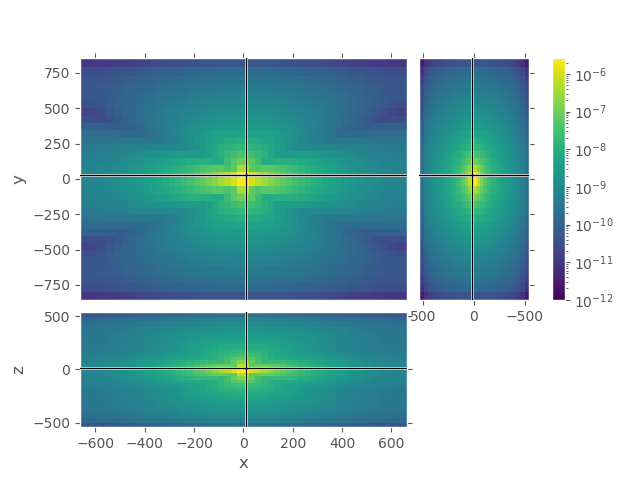

In [8]:
grid.plot_3d_slicer(efield.fx.ravel('F'), view='abs', vType='Ex', pcolorOpts={'norm': LogNorm()})

In [9]:
emg3d.Report(discretize)

--------------------------------------------------------------------------------
  Date: Sat Jan 11 07:31:20 2020 CET

             Linux : OS
                 4 : CPU(s)
            x86_64 : Machine
             64bit : Architecture
            7.7 GB : RAM
           Jupyter : Environment

  Python 3.7.5 (default, Oct 25 2019, 15:51:11)  [GCC 7.3.0]

            0.4.11 : discretize
            1.17.4 : numpy
             1.3.2 : scipy
            0.46.0 : numba
0.9.3.dev17+g698fe17 : emg3d
            7.10.2 : IPython
             3.1.1 : matplotlib

  Intel(R) Math Kernel Library Version 2019.0.5 Product Build 20190808 for
  Intel(R) 64 architecture applications
--------------------------------------------------------------------------------